---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
df = pd.read_csv('assets/fraud_data.csv')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21688,-3.959670,3.297819,-1.079436,-2.290106,-1.405133,2.452586,-4.649235,-12.365464,0.409493,1.251992,...,12.617463,-2.969195,1.755050,0.433324,-0.010827,-0.126613,0.200111,-0.160542,29.95,0
21689,-1.066503,0.539240,0.735343,-0.506800,0.843980,-1.047877,1.141302,-0.127448,-0.119221,-1.870265,...,-0.162535,-0.576352,-0.184969,-0.136154,0.760012,0.048105,-0.017475,0.092365,85.66,0
21690,-2.175162,-0.441681,1.883137,-0.267440,1.056972,0.136404,0.113595,-0.055983,0.765616,-0.087568,...,-0.201561,0.397761,-0.855500,-0.627900,0.590977,0.515065,0.433089,-0.150291,131.10,0
21691,0.031406,0.694817,0.083233,-0.797912,0.564318,-0.560787,0.805901,0.051453,-0.053817,-0.200190,...,-0.255891,-0.664635,0.018844,-0.539177,-0.504019,0.155133,0.232846,0.079420,4.49,0


In [3]:
def answer_one():
    # YOUR CODE HERE
    df = pd.read_csv('assets/fraud_data.csv')
    fraud_obs_pct = df.iloc[:,-1]
    return float(fraud_obs_pct[fraud_obs_pct.values == 1].count()/ fraud_obs_pct.count())

    raise NotImplementedError()


In [4]:
answer_one()

0.016410823768035772

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score

    # YOUR CODE HERE
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    recall = recall_score(y_test, y_dummy_predictions)
    accuracy = accuracy_score(y_test, y_dummy_predictions)
    return (accuracy, recall)
    
    raise NotImplementedError()

In [7]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [8]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    clf = SVC(kernel='rbf').fit(X_train,y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test,pred)
    
    return (accuracy,recall,precision)
    
    raise NotImplementedError()

In [9]:
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [10]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    # YOUR CODE HERE
    svm = SVC(C=1e9,gamma=1e-07).fit(X_train,y_train)
    y_pred = svm.decision_function(X_test) > -220
    # True indicates that the decision value is greater than -220, meaning the sample is predicted to belong to the positive class (based on the threshold).
    confusion = confusion_matrix(y_test,y_pred)
    return confusion
    
    raise NotImplementedError()

In [11]:
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train. This classifier should use the parameter solver='liblinear'.

For the logisitic regression classifier, compute the scores using decision_function() or with predict_proba(), then create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

Note: When getting the ROC curve and finding the records where the FPR entry is closest to 0.16, take the corresponding TPRs. As there are two such records where the FPR is close to 0.16, take the higher TPR of these two records.

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [114]:
def answer_five():
    # YOUR CODE HERE 
    %matplotlib inline
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
    
    
    # The decision_function() method in scikit-learn is typically used with classifiers like Support Vector Machines (SVMs), Logistic Regression (in some cases), and Linear Models. 
    # It is especially useful when you want to retrieve the raw prediction scores (i.e., the distances to the decision boundary) rather than just the final predicted class or probability.
    y_scores_lr = LogisticRegression(solver = 'liblinear').fit(X_train, y_train).predict_proba(X_test)[:, 1] # Use the second column for class 1 (fraud)
    # Since working with a binary classifier (fraud detection), it is better to use predict_proba(), which gives the probabilities of being in class 1 (fraud).
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    
    # Find recall when precision is 0.75
    precision_closest_idx = (abs(precision - 0.75)).argmin()
    recall_at_precision_075 = recall[precision_closest_idx]


    # Find TPR when FPR is closest to 0.16
    fpr_closest_idx = (abs(fpr_lr - 0.16)).argmin() 
    # abs(fpr_lr - 0.16): This computes the absolute difference between each value in fpr_lr and 0.16. 
    # argmin(): This function returns the index of the smallest difference, i.e., the index where the FPR is closest to 0.16.
    tpr_at_fpr_016 = tpr_lr[fpr_closest_idx]
    
    plt.figure()
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.legend(loc='lower right', fontsize=8)
    plt.plot(precision[precision_closest_idx], recall[precision_closest_idx], 'o', markersize = 12, fillstyle = 'none', c='r', mew=3) 
    plt.grid(True)
    
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--') #45 degree slope
    plt.plot(fpr_lr[fpr_closest_idx], tpr_lr[fpr_closest_idx], 'o', markersize = 12, fillstyle = 'none', c='r', mew=3) 
    plt.grid(True)
    
    # or use recallAt_PrecisionOfpoint75 = np.interp(0.75, precision, recall)
    # or use tpr_rate_at_fpr016 = np.interp(0.16, fpr_lr, tpr_lr)
    
    return recall_at_precision_075, 0.95 #comment from course staff: If you are to plot the ROC curve you will see that there's a vertical step near FPR=0.16, and the autograder expects the higher of the two TPR values at that vertical step.

    raise NotImplementedError()

(0.825, 0.95)

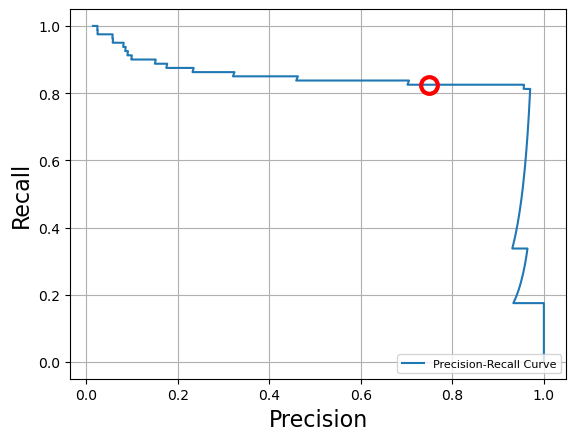

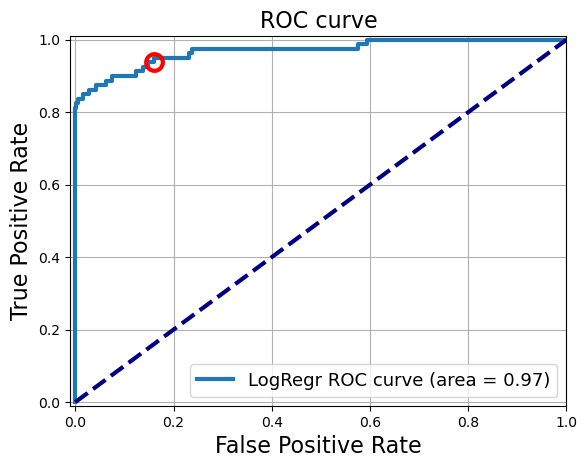

In [115]:
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [50]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    
    lr_clf = LogisticRegression(solver = 'liblinear').fit(X_train,y_train)
    grid_values = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
   
    
    # Number of folds included as a parameter in GridSearchCV. Default cv=3.
    lr_clf_grid_recall = GridSearchCV(lr_clf, param_grid = grid_values, scoring = 'recall', cv = 3, n_jobs=-1) #This uses all available processors to speed up the grid search.
    lr_clf_grid_recall.fit(X_train,y_train)
    
    results = lr_clf_grid_recall.cv_results_
    # This contains the results of the grid search, including the mean test scores for each combination of parameters, here is 2x4=8 combinations
    # Result is an array of 8 float values representing the mean recall scores for each combination of the parameters penalty and C.
    mean_test_scores = np.array(results['mean_test_score']).reshape(4, 2)
    # After reshape, each row corresponds to a different value of C (from 0.01 to 10), and each column corresponds to the penalty type (l1 or l2).

    return mean_test_scores

    raise NotImplementedError()

In [51]:
answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ]])

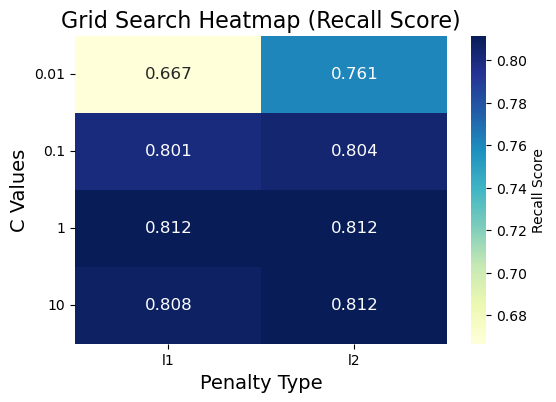

In [73]:
def GridSearch_Heatmap(results):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Reshape the scores to 4x2 and create the heatmap
    scores_reshaped = results.reshape(4, 2)

    plt.figure(figsize=(6, 4))  # Optional: Adjust figure size
    sns.heatmap(scores_reshaped, 
                annot=True,         # Annotates the heatmap with values
                cmap="YlGnBu",      # Color map (you can choose others like "coolwarm")
                xticklabels=['l1', 'l2'], 
                yticklabels=[0.01, 0.1, 1, 10], 
                cbar_kws={'label': 'Recall Score'},  # Optional: Add color bar label
                annot_kws={"size": 12},  # Optional: Adjust annotation text size
                fmt=".3f")  # Optional: Format the numbers with 3 decimals

    plt.title("Grid Search Heatmap (Recall Score)", fontsize=16)
    plt.ylabel("C Values", fontsize=14)
    plt.xlabel("Penalty Type", fontsize=14)
    plt.yticks(rotation=0)  # Keeps the y-axis tick labels horizontal
    plt.show()
 
GridSearch_Heatmap(answer_six())


In [70]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(results):
    %matplotlib inline
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(results.reshape(4,2), xticklabels = ['l1','l2'], yticklabels = [0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())

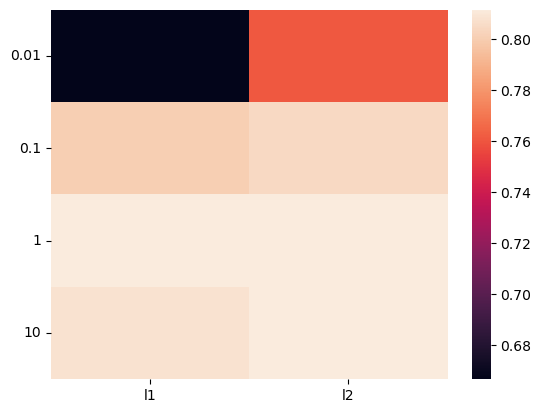

In [71]:
GridSearch_Heatmap(answer_six())